<h1> Data Analytics - II : Logistic Regression</h1>

<h4> Problem Statement </h4>
<h5> 1. Implement logistic regression using Python/R to perform
classification on
Social_Network_Ads.csv dataset.<br>
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.</h5>

In [30]:
#imports 
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [9]:
data = pd.read_csv("Social_Network_Ads.csv")

In [10]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
233,15614187,Male,49,86000,1
147,15749130,Female,41,30000,0
134,15800061,Female,28,55000,0
72,15595228,Female,20,23000,0
73,15782530,Female,33,113000,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

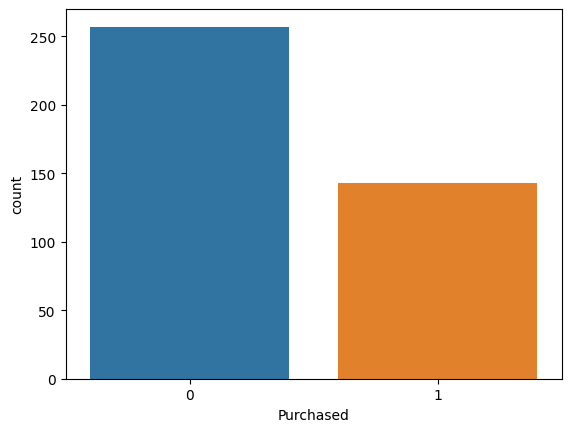

In [14]:
# Target label : 'Purchased'
sns.countplot(data = data, x = 'Purchased');

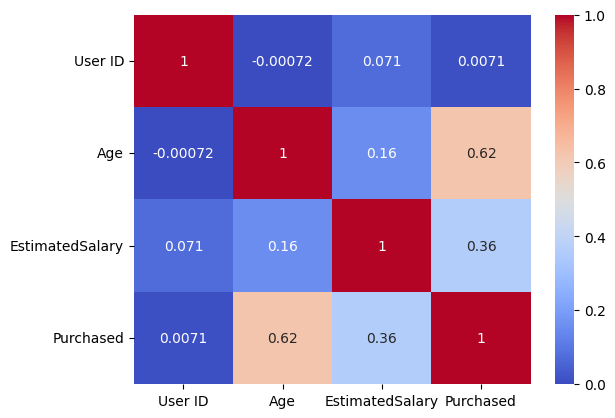

In [16]:
# Finding useful features 
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm' );

In [17]:
features = data[['Age', 'EstimatedSalary']]
label = data['Purchased']

In [18]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [20]:
x = features
y = label

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Prediction

In [26]:
y_pred = model.predict(x_test)

In [27]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

### Evaluation

<AxesSubplot:>

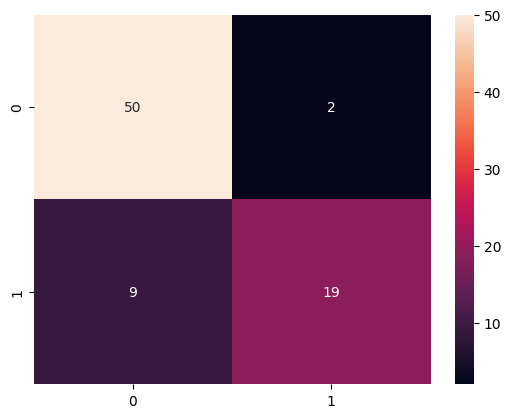

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

